In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Adding a "conn" variable to assist a "pd.read_sql" usage
conn = engine.connect()

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [13]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
session=Session(engine)
inspector=inspect(engine)

# Exploratory Precipitation Analysis

In [17]:
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

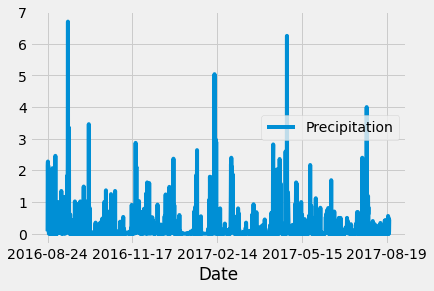

In [24]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

rain_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

precipitation_df = pd.DataFrame(rain_results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df = precipitation_df.dropna()

ax = precipitation_df.plot().get_figure()

In [25]:
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
numofStations = session.query(Station)
print("{} stations in the dataset.".format(numofStations.count()))

9 stations in the dataset.


In [37]:
mostActive = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActive = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
mostActive

tempMes = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

min_max_avg_temp = session.query(*tempMes).\
    filter(Measurement.station == "USC00519281").all()
min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

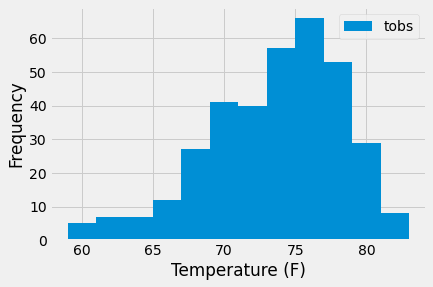

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostActive = "USC00519281"

twelveMonths = session.query(Measurement.tobs).filter(Measurement.station == mostActive).\
                filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").all()

twelveMonths = np.ravel(twelveMonths)
twelveMonths
plt.hist(twelveMonths, bins=12, label="tobs")
plt.legend(loc="best")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()